<a href="https://colab.research.google.com/github/ambolt314/covid-decision-tree/blob/main/covid_decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [108]:
from google.colab import files
uploaded = files.upload()

Saving SID_1934573_raw data.csv to SID_1934573_raw data.csv


In [109]:
import pandas as pd
raw_covid_data = pd.read_csv("/content/SID_1934573_raw data.csv")
print(raw_covid_data)
headers = list(raw_covid_data.columns)
print("Headers: ", headers)

   subject_id  fever  cough  ...  chills  loss_of_smell_or_taste  covid_19_result
0           1   True   True  ...   False                    True         POSITIVE
1           2  False  False  ...   False                   False         NEGATIVE
2           3  False  False  ...   False                   False         POSITIVE
3           4  False   True  ...   False                   False         POSITIVE
4           5  False  False  ...   False                   False         POSITIVE
5           6  False  False  ...   False                   False         NEGATIVE
6           7  False  False  ...    True                   False         NEGATIVE
7           8  False   True  ...    True                   False         POSITIVE
8           9   True   True  ...    True                    True         POSITIVE
9          10  False  False  ...   False                    True         POSITIVE

[10 rows x 11 columns]
Headers:  ['subject_id', 'fever', 'cough', 'fatigue', 'sore_throat', 'runn

In [110]:
# parse dataset
import numpy as np
def convert_to_arrays(data):
  numpy_arr = np.array(data)
  
  # array output
  symptoms_output = []
  covid_output = []

  for item in numpy_arr:
    new_item = list(item)

    symptoms = new_item[1:10]# starts at 1 to obfuscate subject ID
    covid = new_item[-1:]

    if covid[0] == 'POSITIVE':
      covid_output.append(True)
    elif covid[0] == 'NEGATIVE':
      covid_output.append(False)

    symptoms_output.append(symptoms)
  return [symptoms_output, covid_output]

    


In [123]:
from sklearn import tree
import graphviz

def generate_decision_tree(arrays):
  #generate tree
  clf = tree.DecisionTreeClassifier()
  clf.fit(arrays[0], arrays[1])
  
  #render tree
  tree.plot_tree(clf)


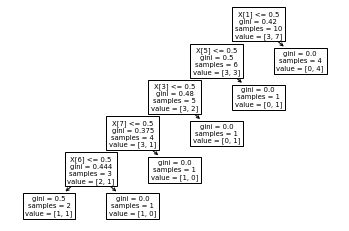

In [124]:
# MAIN EXECUTION block
parsed_data = convert_to_arrays(raw_covid_data)
generate_decision_tree(parsed_data)